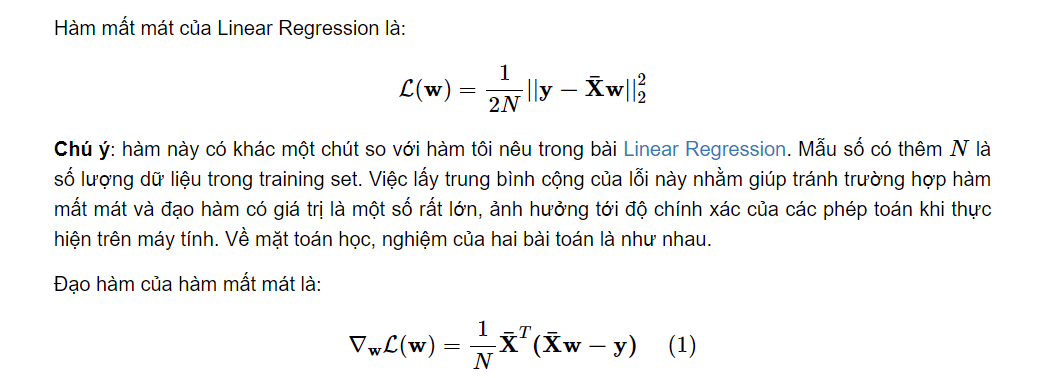

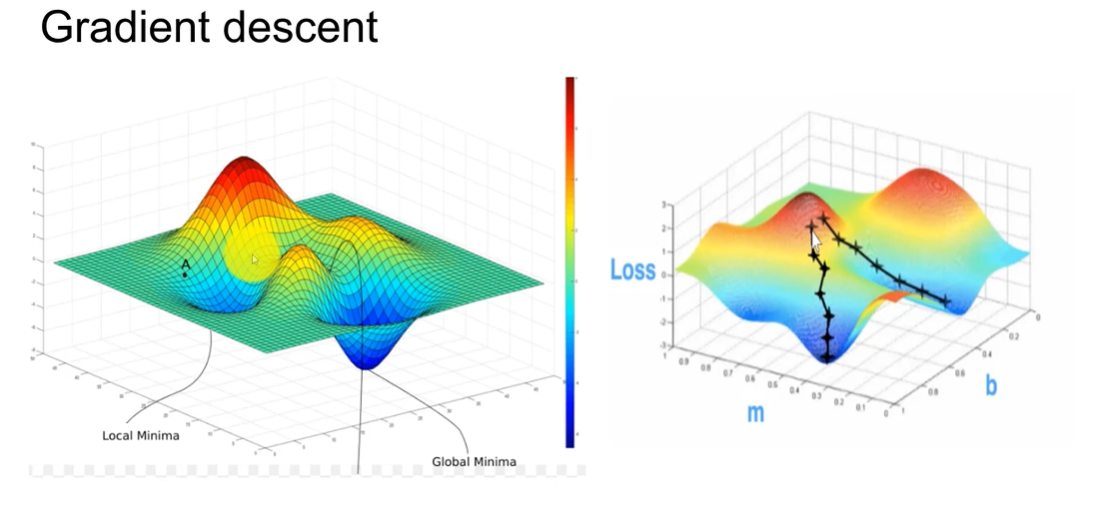


<h1>Ví dụ</h1>

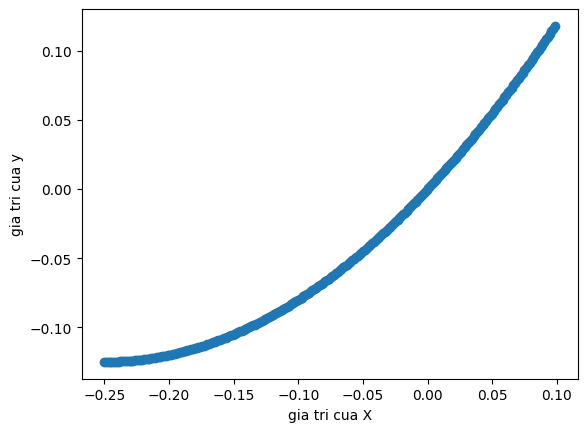

-0.2500000000000009


In [4]:
# viet ham tim gia tri x de phuong trinh co cuc tri
# y = 2x^2 + x
import matplotlib.pyplot as plt

def daoHam(xo):
   return 4*xo + 1

def timX(xo, learning_rate, iter):
   x_history = []
   x_new = xo
   for i in range(iter):
       x_new -= daoHam(xo)*learning_rate
       x_history.append(x_new)
       if daoHam(x_new) < 0.0001:
           break
   return x_new, x_history

x_new, x_history = timX(0.1,0.001,500)

def hienThiJ(x_history):
   J = []
   for k in x_history:
       y = 2*k*k + k
       J.append(y)
   return J

J = hienThiJ(x_history)

plt.scatter(x_history, J)
plt.xlabel("gia tri cua X")
plt.ylabel("gia tri cua y")
plt.show()
print(x_new)


In [5]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [7]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


<h1>Bài toán Linear Regression</h1>

In [8]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

<b>Tiếp theo, chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng 
y
=
4
+
3
x
, hiển thị chúng và tìm nghiệm theo công thức:</b>

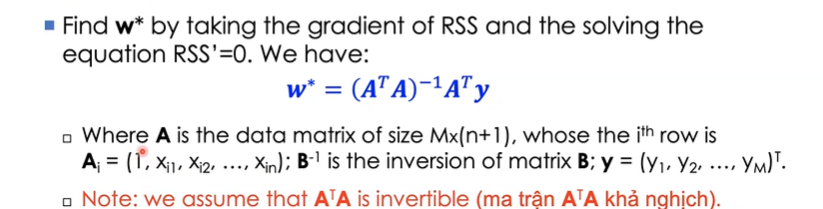

(1000, 2)
Solution found by formula: w =  [[3.99958926 3.00159306]]
(2, 1)


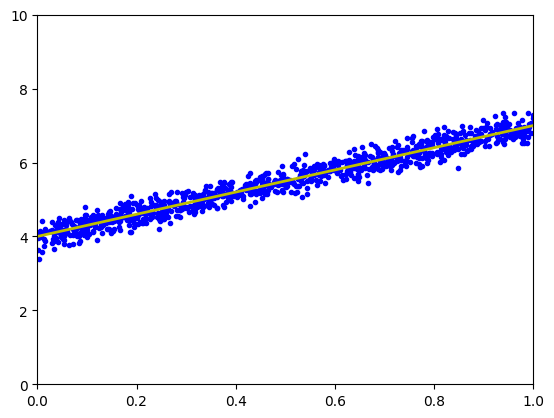

In [14]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)
print(w_lr.shape)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

<b>Đường thẳng tìm được là đường có màu vàng có phương trình 
y
≈
4
+
2.998
x
.</b>
<br>
<b>Tiếp theo ta viết đạo hàm và hàm mất mát:</b>

In [10]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

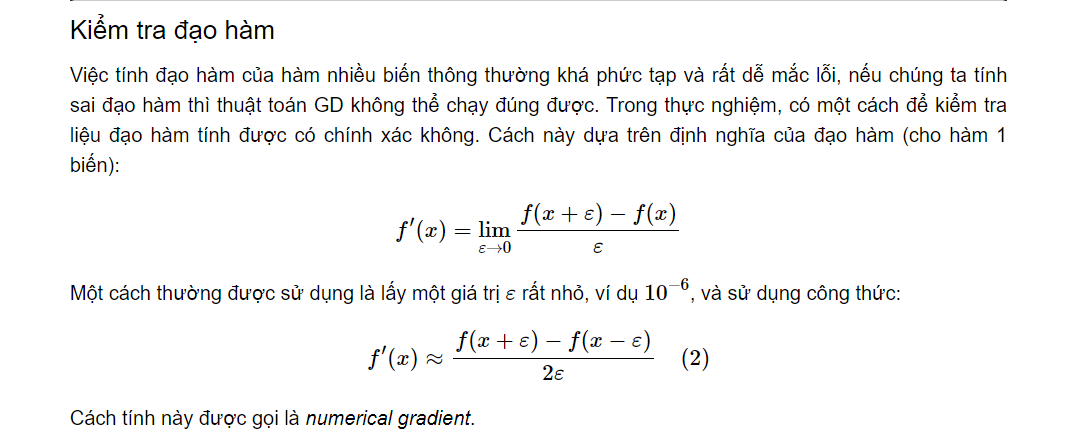
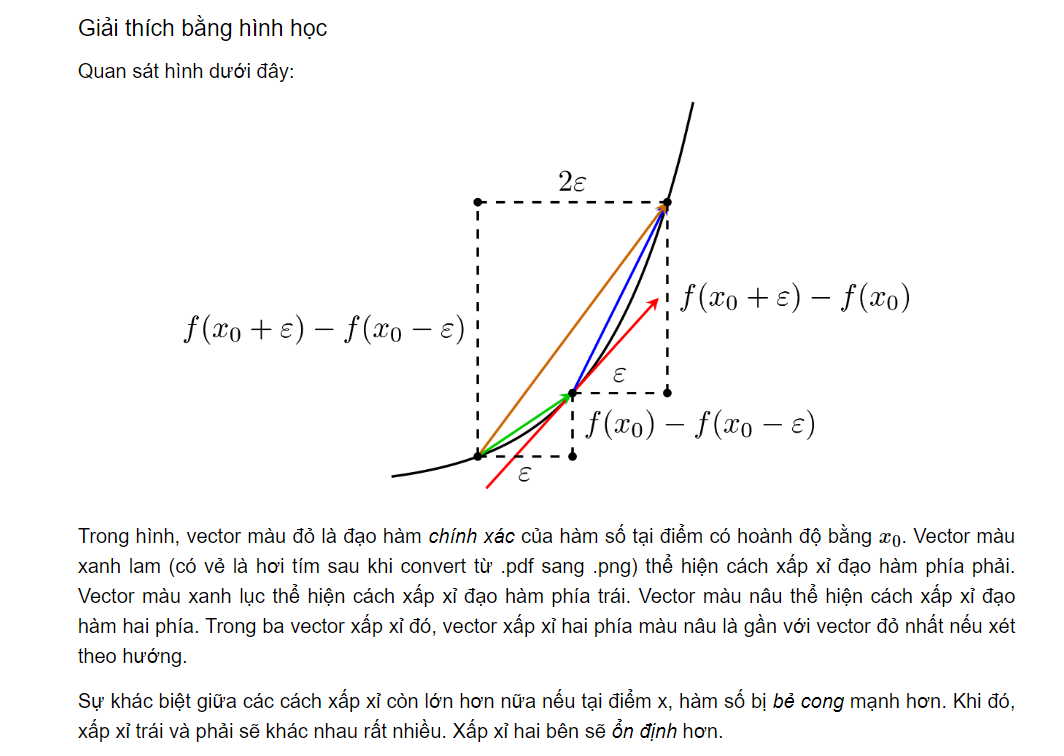
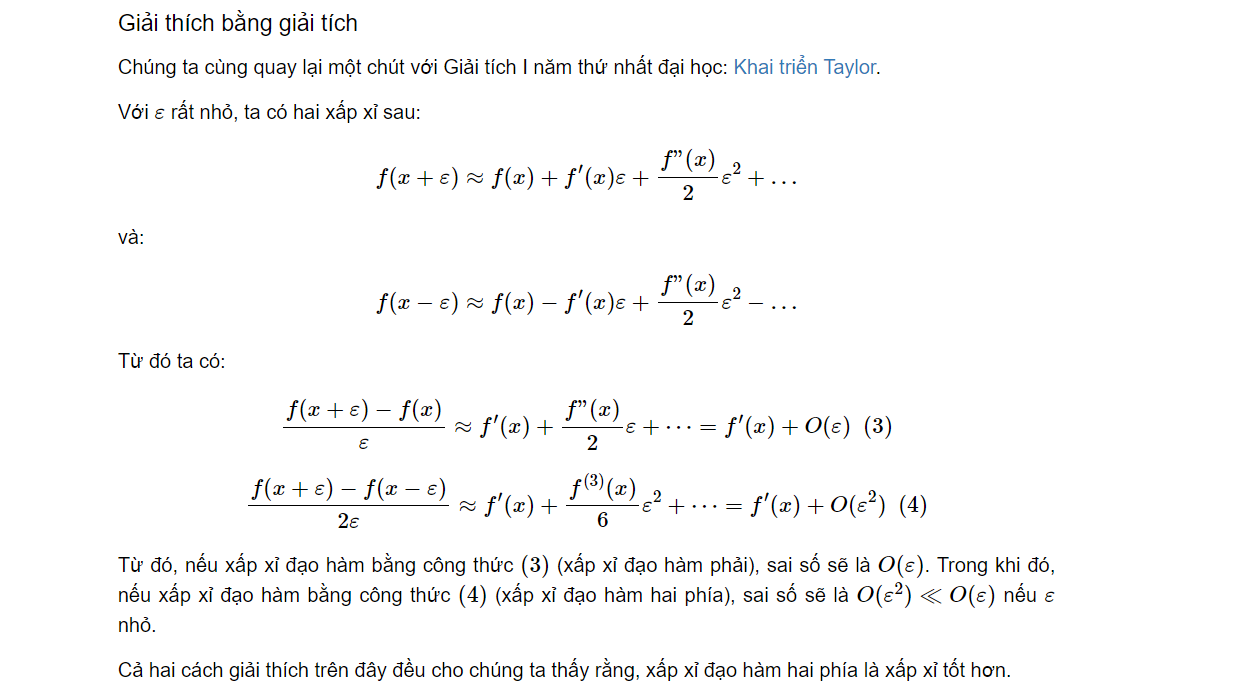

In [11]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


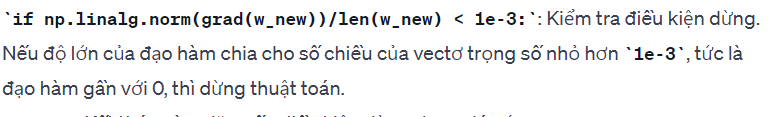

In [12]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


<h1>1. Các thuật toán tối ưu Gradient Descent</h1>

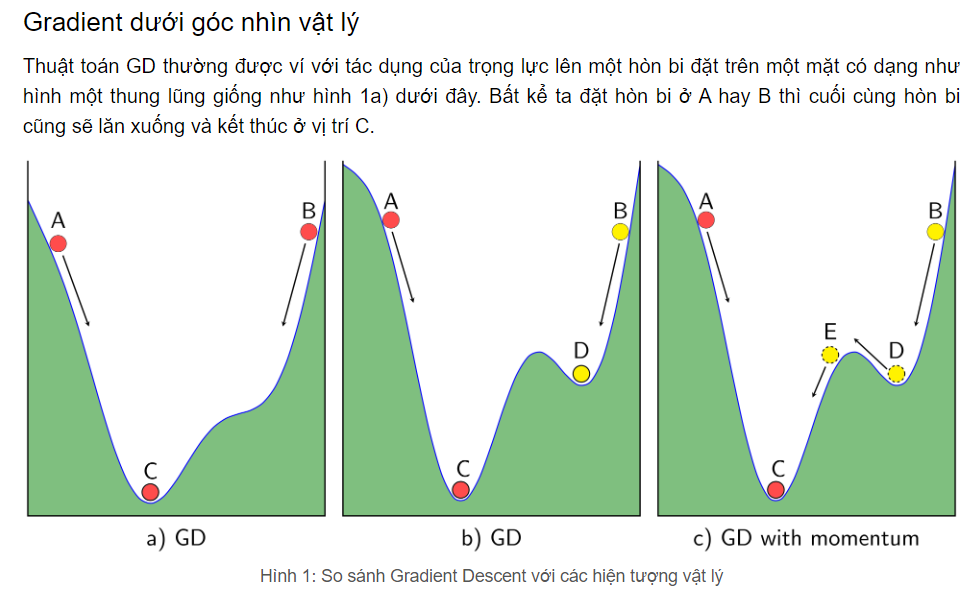

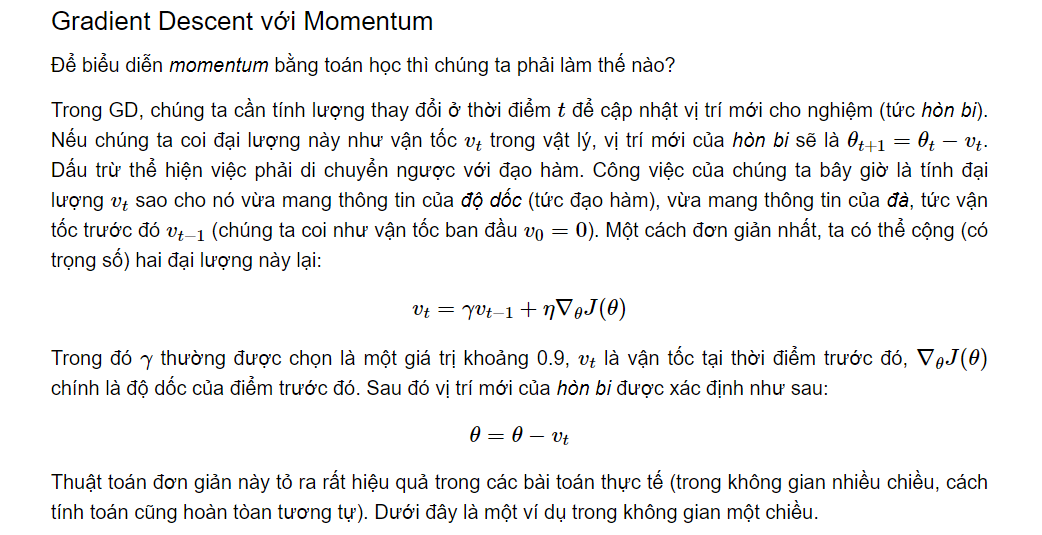

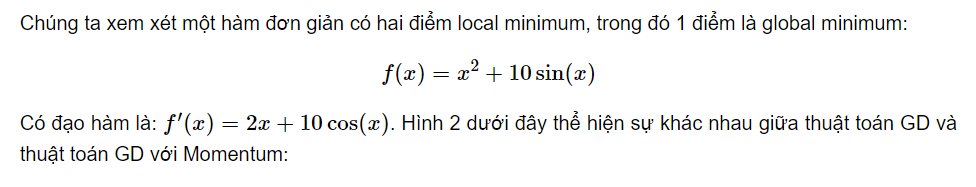

![Mô tả ảnh GIF](https://machinelearningcoban.com/assets/GD/nomomentum1d.gif)
![Mô tả ảnh GIF](https://machinelearningcoban.com/assets/GD/momentum1d.gif)


In [1]:
# check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 
    # this variable includes all points in the path
    # if you just want the final answer, 
    # use `return theta[-1]`

<h1>1.3. Các thuật toán khác</h1>
<b>Ngoài hai thuật toán trên, có rất nhiều thuật toán nâng cao khác được sử dụng trong các bài toán thực tế, đặc biệt là các bài toán Deep Learning. Có thể nêu một vài từ khóa như Adagrad, Adam, RMSprop,… Tôi sẽ không đề cập đến các thuật toán đó trong bài này mà sẽ dành thời gian nói tới nếu có dịp trong tương lai, khi blog đã đủ lớn và đã trang bị cho các bạn một lượng kiến thức nhất định. </b>

<h1>2 : Biến thể</h1>

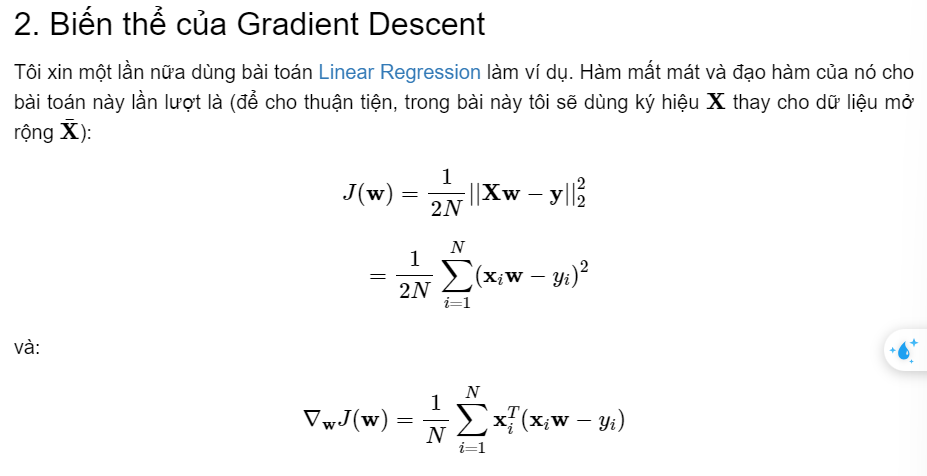

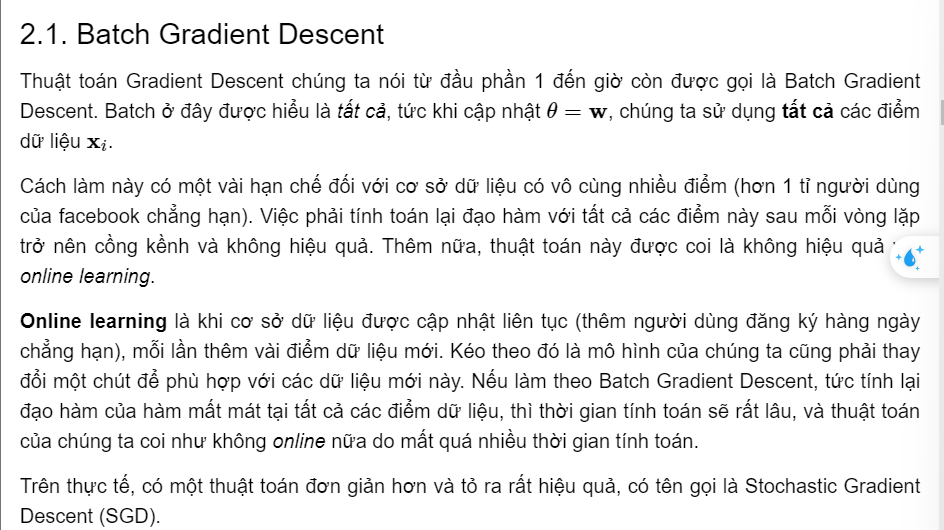

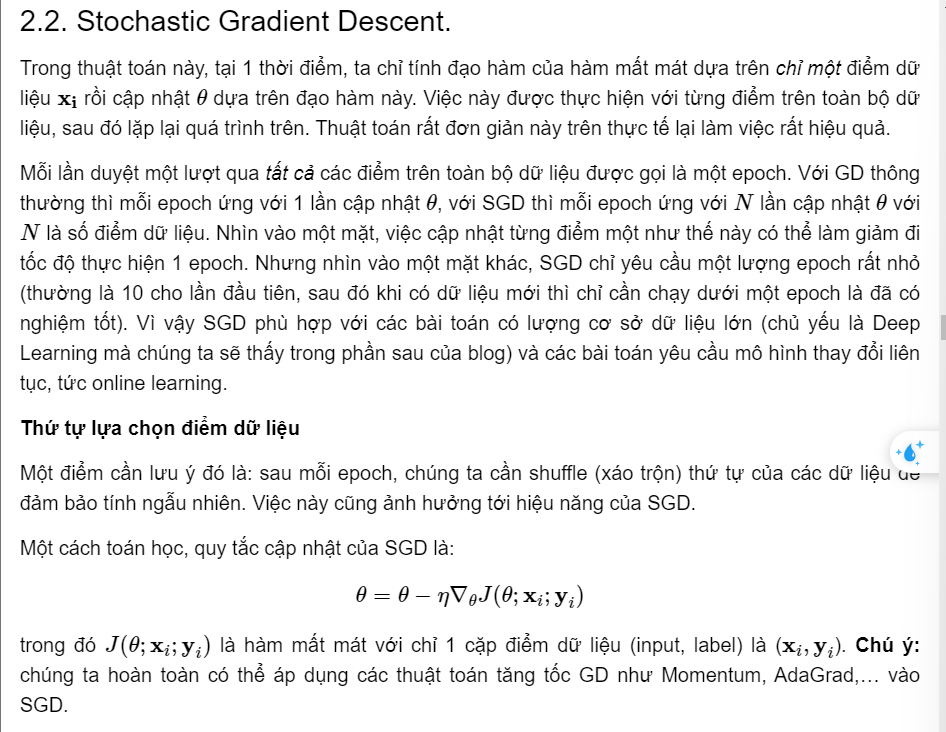

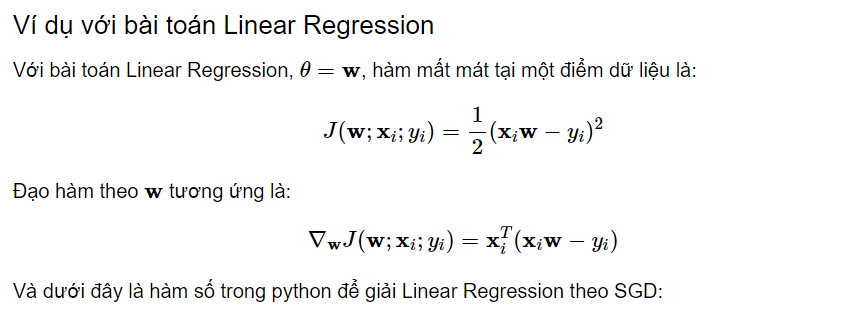

In [2]:
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
    return w

![Mô tả ảnh GIF](https://machinelearningcoban.com/assets/GD/LR_SGD_contours.gif)
![Mô tả ảnh GIF](https://machinelearningcoban.com/assets/GD/LR_SGD_loss.png)


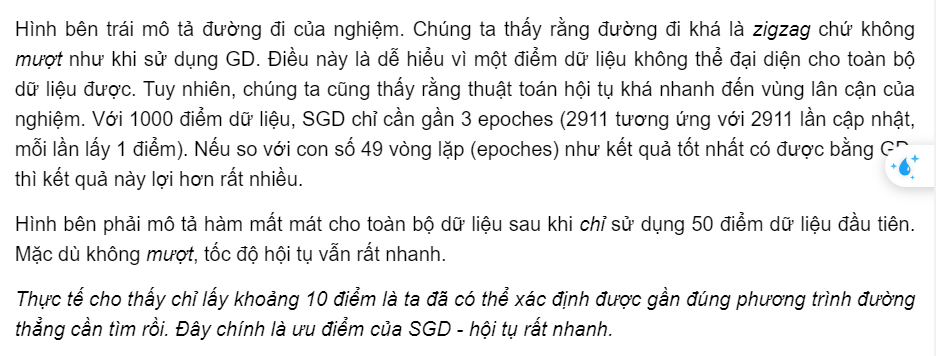

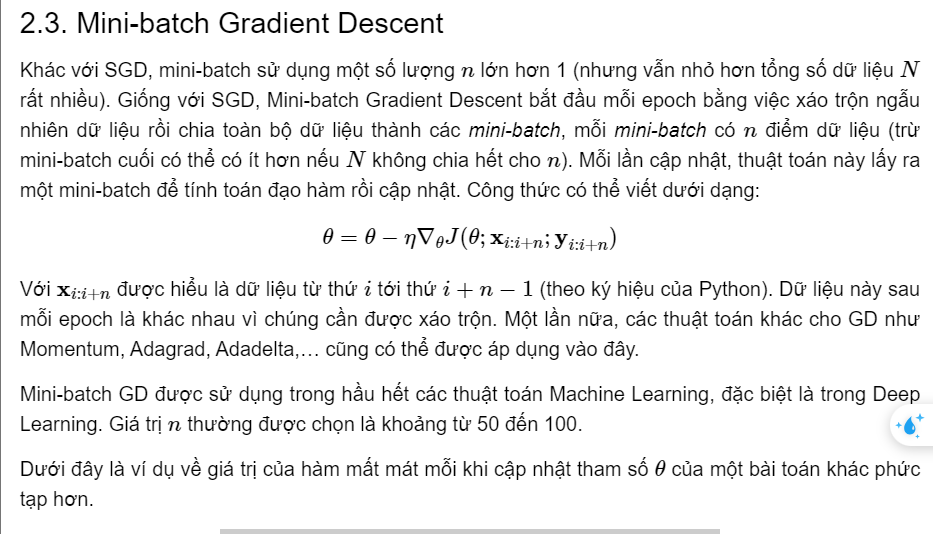

![](https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png)

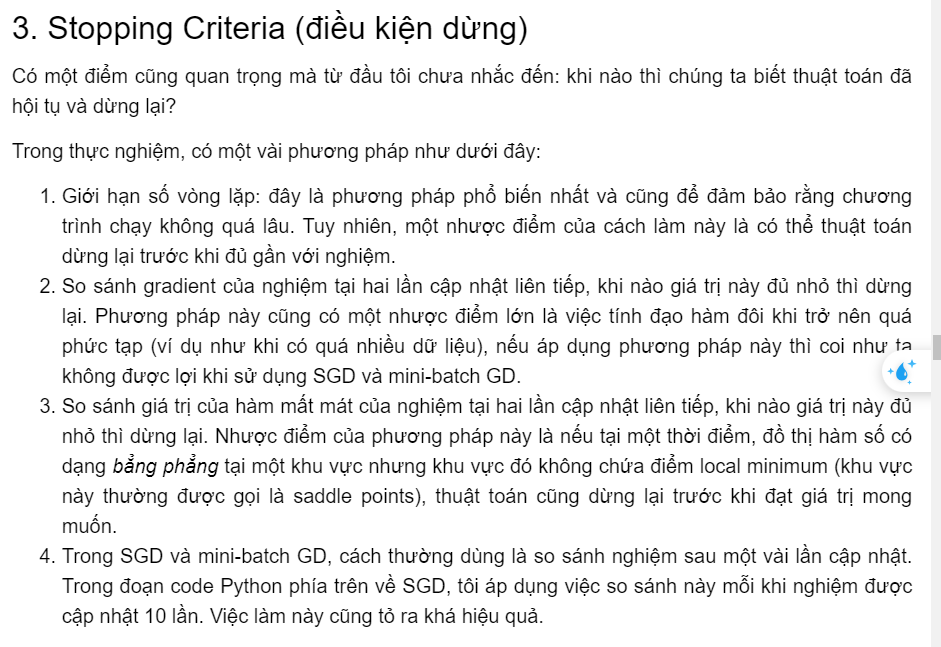

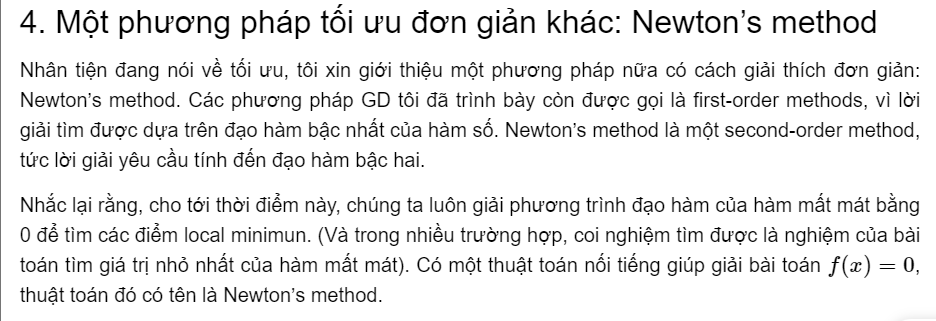

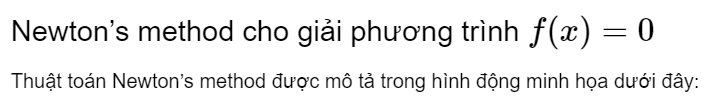

![](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

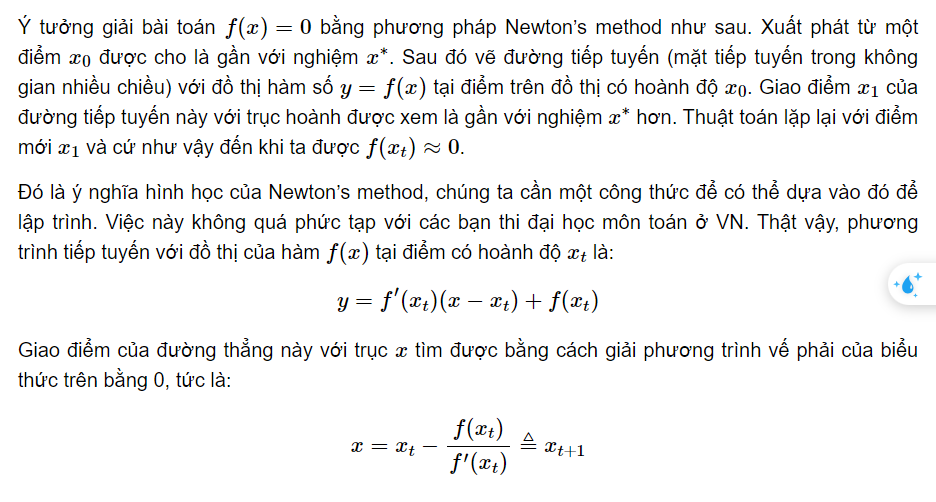

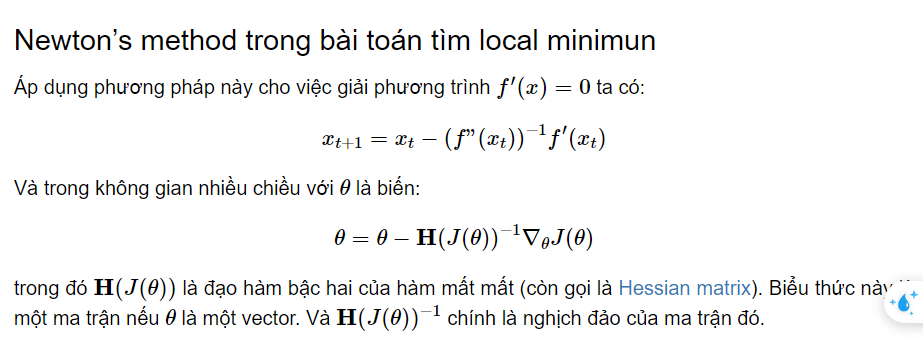

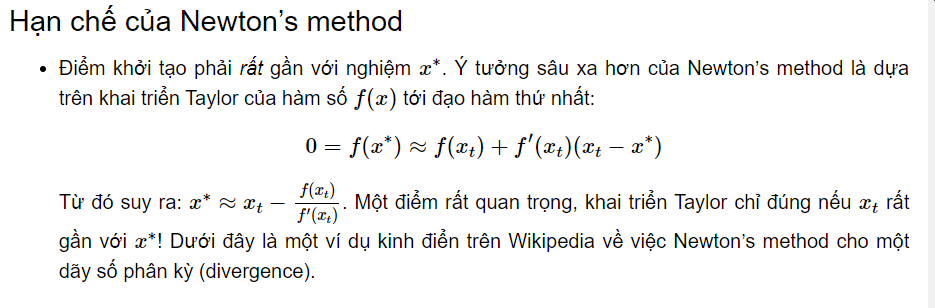

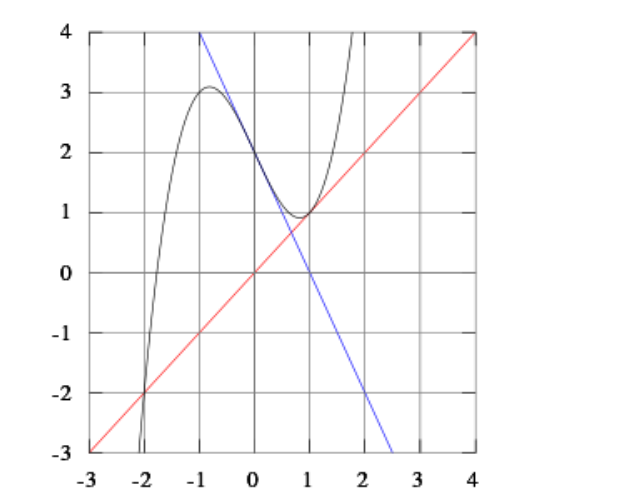

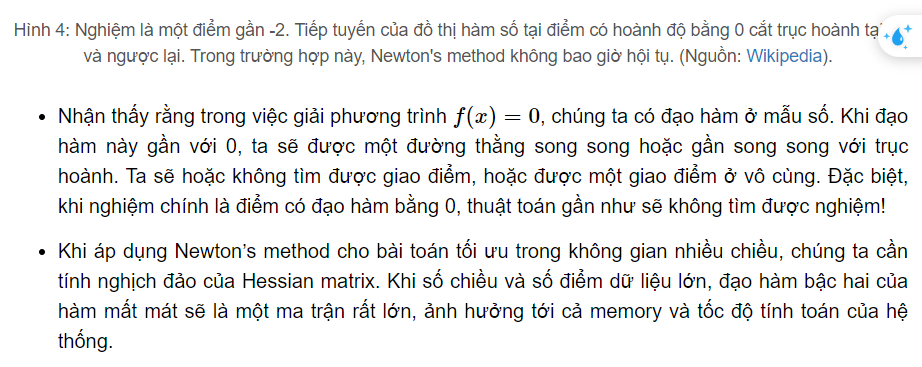